# MEG Analysis Serial Dependence 

In [1]:
import os
import numpy as np
import mne
import re
#import matplotlib.pyplot as plt

%matplotlib qt

# Load Data

First create a dictionary that maps folders to trials

In [2]:
home = '../MEG_raw01/'
home_folders = os.listdir(home)
home_folders = [os.path.join(home, entry) for entry in home_folders if re.findall(r"^\w+", entry)]
folder_dict = {}
for folder in home_folders:
    entries = os.listdir(folder)
    folder_dict[folder] = [os.path.join(folder, entry) for entry in entries if re.findall(r"^\w+SD_\w*raw.fif", entry)]

In [3]:
ch_exclude = ['MEG2631','MEG2632','MEG2633','MEG2641','MEG2642','MEG2643','MEG2914','MEG2915','MEG2916','MEG2924','MEG2925',
'MEG2926','MEG2934','MEG2935','MEG2936','MEG2944','MEG2945','MEG2946','MEG3014','MEG3015','MEG3016','MEG3024','MEG3025',
'MEG3026','MEG3034','MEG3035','MEG3036','MEG3044','MEG3045','MEG3046','MEG3114','MEG3115','MEG3116','MEG3124','MEG3125',
'MEG3126','MEG3134','MEG3135','MEG3136','MEG3144','MEG3145','MEG3146','MEG3214','MEG3215','MEG3216','MEG3224','MEG3225',
'MEG3226','MEG3234','MEG3235','MEG3236','MEG3244','MEG3245','MEG3246']

In [4]:
data_path = folder_dict['../MEG_raw01/170808_nakamura_SD'][1]
raw = mne.io.read_raw_fif(data_path)

original = raw.copy()
raw.load_data().filter(l_freq=2.5, h_freq=50)
raw.pick_types(meg='grad', stim=True)

#print(raw.info)

Opening raw data file ../MEG_raw01/170808_nakamura_SD/20170808_1601_SD_raw.fif...
    Read a total of 10 projection items:
        grad_68_noIAS_20140702-2.fif : PCA-v1 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v2 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v3 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v4 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v5 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v1 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v2 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v3 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v4 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v5 (1 x 360)  idle
    Range : 20000 ... 628999 =     20.000 ...   628.999 secs
Ready.
Current compensation grade : 0
Reading 0 ... 608999  =      0.000 ...   608.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2.5 - 50 Hz

FIR filter parame

<Raw  |  20170808_1601_SD_raw.fif, n_channels x n_times : 243 x 609000 (609.0 sec), ~1.11 GB, data loaded>

In [5]:
raw.info

<Info | 28 non-empty fields
    acq_pars : str | 26828 items
    bads : list | 0 items
    ch_names : list | MEG0112, MEG0113, MEG0122, MEG0123, MEG0132, MEG0133, ...
    chs : list | 243 items (GRAD: 240, STIM: 3)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 10 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 446 items (3 Cardinal, 5 HPI, 438 Extra)
    events : list | 1 items
    experimenter : str | 19 items
    file_id : dict | 4 items
    gantry_angle : float | 68.0
    highpass : float | 2.5 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 3 items
    line_freq : float | 60.0
    lowpass : float | 50.0 Hz
    meas_date : tuple | 2017-08-08 06:51:17 GMT
    meas_id : dict | 4 items
    nchan : int | 243
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 10 items
    projs : list | grad_68_noIAS_20140702-2.fif : PCA-v1: off, ...
    sfreq :

# ICA Analysis

In [6]:
ica = mne.preprocessing.ICA(n_components=80, max_iter=1600)
ica.fit(raw)

Fitting ICA to data using 240 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 80 components
Fitting ICA took 40.4s.


<ICA  |  raw data decomposition, fit (fastica): 609000 samples, 80 components, channels used: "grad">

Reject eye movements, noisy signals

In [7]:
ica.exclude = [0, 1]
ica.plot_properties(raw, picks = ica.exclude)
ica.plot_components()
raw.load_data()
ica.apply(raw)

    Using multitaper spectrum estimation with 7 DPSS windows
304 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
304 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Transforming to ICA space (80 components)
Zeroing out 2 ICA components


<Raw  |  20170808_1601_SD_raw.fif, n_channels x n_times : 243 x 609000 (609.0 sec), ~1.11 GB, data loaded>

# Epoch Data

Event IDs

In [8]:
#print(raw.ch_names)
chan_idxs = [raw.ch_names.index(ch) for ch in raw.ch_names]
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, tmin=-0.2, tmax = 1.5)
epochs.plot_image(picks = ['MEG0422'])

102 events found
Event IDs: [   64 16384 32768]
102 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 5)
10 projection items activated
Loading data for 102 events and 1701 original time points ...


<ipython-input-8-b545b09e49d6>:3: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = mne.find_events(raw)


0 bad epochs dropped
102 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


[<Figure size 640x480 with 4 Axes>]

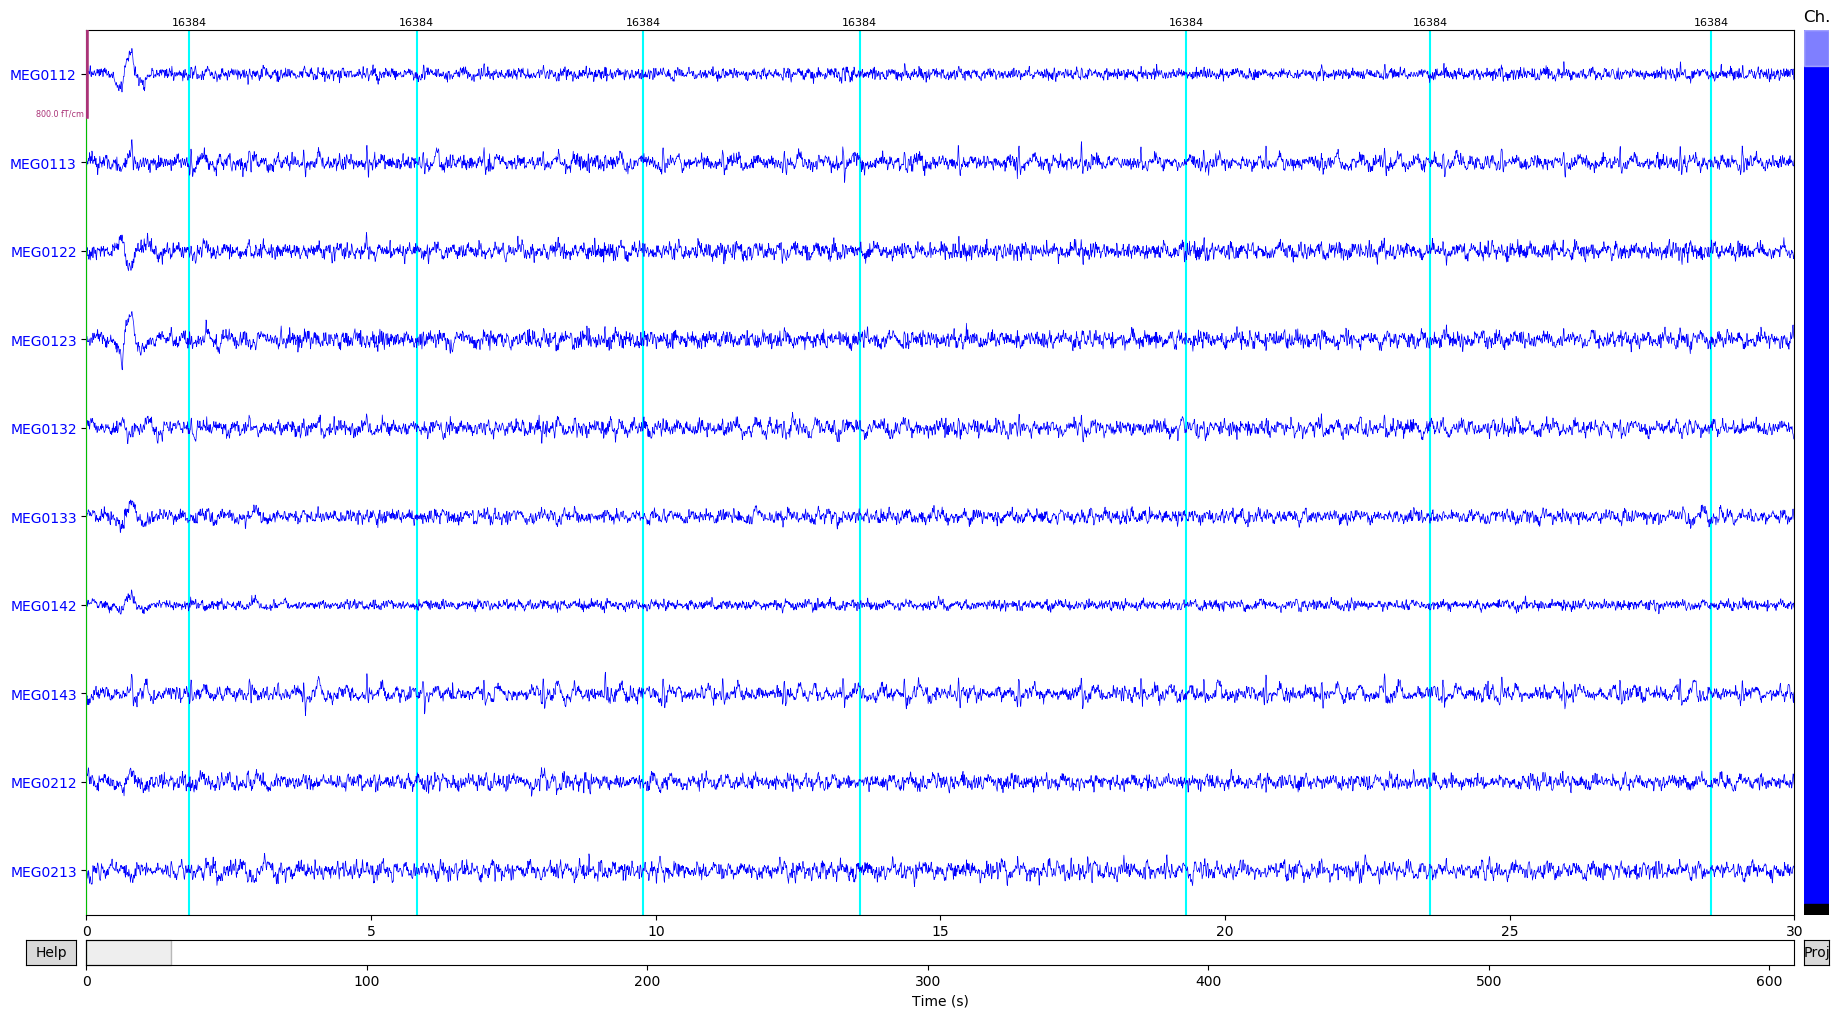

In [9]:
raw.plot(events=events, n_channels=10, duration=30)

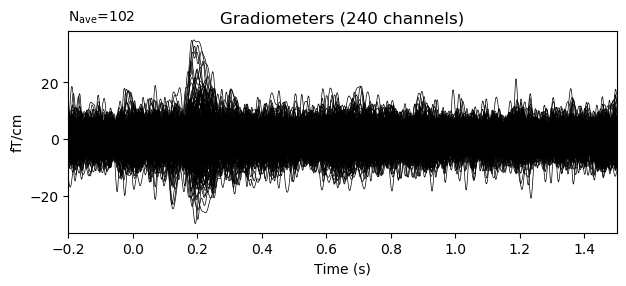

In [10]:
evoked = epochs.average()
evoked.plot()

In [11]:
epochs.plot_psd(fmin=2., fmax=40., average=True, spatial_colors=False, picks=[])
epochs.plot_psd_topomap(ch_type='grad', normalize=True)

ValueError: No appropriate channels found for the given picks ([])

# Time Frequency Analysis

In [ ]:
freqs = np.logspace(*np.log10([2, 35]), num=8)
n_cycles = freqs / 2.
power , itc = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)

In [ ]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
#power.plot([82], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[82])

#fig, axis = plt.subplots(1, 2, figsize=(7,4))
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12, 
                   baseline=(-0.5, 0), mode='logratio', 
                  title='Alpha', show=False)
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12, 
                   baseline=(-0.5, 0), mode='logratio',
                  title='Beta', show=False)


# Trial separation

In [ ]:
from scipy.io import loadmat

In [ ]:
data = loadmat("../MEG/Behaviour/06oishi0131/oishi0131_session_20170131T134216_block1_data.mat")

In [ ]:
timeResponse = data['GabOrSpec']
Response = np.reshape(Response, (100,))
Target = data['TargetGabor'][0]
Cond = data['CouplesOrder']
RespTime = data['TimeArray']

In [ ]:
Error = Response - Target

In [ ]:
trialGaborDiff = np.hstack((np.array([0]),(Target[1:]-Target[:-1])))

In [ ]:
def fixOrientation(arr):
    for i in range(len(arr)):
        if arr[i] > 90:
            arr[i] -= 180
        elif arr[i] < -90:
            arr[i] += 180
    return arr

In [ ]:
Error = np.nan_to_num(Error)

In [ ]:
data_epoch = loadmat('../MEG_icareject/170807_hashizume_SD_data_tsss_ica_reject.mat')

In [ ]:
data_epoch['data_all_clean_ica']